*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/3_head_lexemes.ipynb)*

# Time Adverbial Distribution and Collocations
## Head Lexemes
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [15]:
! echo "last updated:"; date

last updated:
Sat 13 Jun 2020 20:17:21 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [1]:
# see .py's for variables
from config import *
from get_hmod_sample import *

# Head and Modifier Sample

## Function Head Lexemes

In [2]:
head2funct = pd.pivot_table(
    head_mod_df,
    index='head_etcbc',
    columns='function',
    aggfunc='size',
    fill_value=0
)

print(head2funct.shape)
head2funct.head()

(4220, 6)


function,Adju,Cmpl,Loca,Objc,Subj,Time
head_etcbc,,,,,,
<B/,6,6,0,4,7,0
<B=/,0,0,0,0,1,0
<B==/,0,1,0,0,0,0
<BD/,21,88,0,42,147,0
<BDH/,17,12,0,19,10,0


### Function head lexeme diversity

Determine how many head lexemes per 100 uses are found for each function.<br>
Adapted from ["Normalizing Word Counts"](http://www.thegrammarlab.com/?nor-portfolio=normalizing-word-counts).

In [3]:
is_attested = (head2funct > 0) * 1
n_attested = is_attested.sum()
head_per_100 = (n_attested / head2funct.sum()) * 100 # normalize per 100 uses of the function
head_per_100 = head_per_100.sort_values()

In [4]:
n_attested

function
Adju    1473
Cmpl    2035
Loca     354
Objc    2214
Subj    2408
Time     115
dtype: int64

In [5]:
head2funct.sum()

function
Adju     6825
Cmpl    17444
Loca     2137
Objc    16684
Subj    26540
Time     3490
dtype: int64

In [6]:
head_per_100

function
Time     3.295129
Subj     9.073097
Cmpl    11.665902
Objc    13.270199
Loca    16.565278
Adju    21.582418
dtype: float64

In [7]:
head2funct.sum(1).sort_values(ascending=False).head(25)

head_etcbc
JHWH/     3212
JWM/      1681
BN/       1397
>RY/      1378
>JC/      1169
JD/       1100
BJT/       990
<M/        980
MLK/       918
DBR/       918
HW>        904
>LHJM/     771
>NJ        733
<JN/       700
CM/        689
KL/        663
CM         654
>TH        636
DWD==/     583
JFR>L/     550
MCH=/      537
NPC/       516
<JR/       513
LB/        424
DRK/       423
dtype: int64

### Association: how associated are given head words with their attested function?

Apply Fisher's exact test for statistical significance between given functions and given head lexemes.

In [8]:
fish_head, odds_head = mystats.apply_fishers(head2funct, 0, 1)
fish_head.head()

,Adju,Cmpl,Loca,Objc,Subj,Time
<B/,1.781519,0.092863,0.000000,-0.095101,-0.175581,-0.203684
<B=/,0.000000,0.000000,0.000000,0.000000,0.440135,0.000000
<B==/,0.000000,0.622390,0.000000,0.000000,0.000000,0.000000
<BD/,-0.711117,1.611689,-3.445579,-3.639347,5.388567,-6.082166
<BDH/,4.849212,-0.189689,-0.377679,1.076157,-2.629960,-0.934684


In [9]:
# look at number of Fisher values with positive statistical significance threshold

# total number of heads per function
total_heads = (head2funct != 0) * 1
total_heads = total_heads.sum()

# total number of statistically attracted heads per function
#sig_heads = (fish_head > 1.3) * 1  # multiply by 1 to convert T/F to 0/1 for summing

sig_heads = (fish_head >= 1.3)  * 1
sig_heads = sig_heads.sum()

# proportion of statistically attracted heads per function
sig_heads_prop = sig_heads.div(total_heads).sort_values()

sig_heads_prop

Subj    0.106728
Cmpl    0.128256
Objc    0.178862
Adju    0.214528
Loca    0.451977
Time    0.513043
dtype: float64

### Get top 10 heads per function

In [10]:
def get_lexnode(lex_str):
    """Lookup lexnode for BHSA lex string"""
    node = next(
        l for l in F.otype.s('lex') 
            if F.lex.v(l) == lex_str
    )
    return node

In [11]:
top_10s = [] 

for funct in fish_head.columns:
    scores = fish_head[funct]
    sig_scores = scores[scores >= 1.3]
    top_scores = sig_scores.sort_values(ascending=False)
    raw_scores = top_scores.values
    lexs = [F.voc_lex_utf8.v(get_lexnode(l)) for l in top_scores.index]
    top_10s.append(pd.DataFrame(zip(lexs, raw_scores), columns=('lex', 'score')))

In [12]:
top_10_scores = pd.concat(top_10s, axis=1, keys=fish_head.columns)
top_10_scores.index = top_10_scores.index + 1
top_10_scores.index.name = 'ranks'
#top_10_scores.head(20).round(2).to_clipboard()
top_10_scores.head(20)

Adju                      Cmpl                     Loca  \
               lex       score           lex      score           lex   
ranks                                                                   
1             כֵּן  115.751464         אֶרֶץ  82.290400          שָׁם   
2              רֹב   31.282987        בַּיִת  76.246726         אֶרֶץ   
3             פֶּה   30.407761  יְרוּשָׁלִַם  71.548662      מִדְבָּר   
4            חֶרֶב   26.431468          שָׁם  54.502535           הַר   
5            אַיִן   23.688852           יָד  48.510231        שָׂדֶה   
6           בֶּטַח   23.493857     מִצְרַיִם  39.711160        בַּיִת   
7            עַיִן   22.148341          עִיר  29.912315  יְרוּשָׁלִַם   
8        מִשְׁפָּט   15.315284        בָּבֶל  26.762729        מָקֹום   
9      מִשְׁפָּחָה   14.168122         אֹהֶל  26.675101          פֹּה   
10         שָׁלֹום   13.953455        מָקֹום  25.302493         קֶרֶב   
11          עֲבוּר   13.400885           הַר  23.565722       שֶׁמֶשׁ   
12        רִאשֹׁון   12.907149         קֶרֶב  17.760116          חוּץ   
13        שְׁגָגָה   12.363012       תָּוֶךְ  17.499547        שַׁעַר   
14            כֹּל   12.052559          רֵעַ  17.225285        פֶּתַח   
15           מַעַל   12.051341    יִשְׂרָאֵל  16.730142      שָׁמַיִם   
16            עֹור   11.946764       מַחֲנֶה  15.577805      חֶבְרֹון   
17          רָצֹון   11.571921           אָב  14.898408       גְּבוּל   
18           מְאֹד   10.053695          אֵשׁ  13.767248         חֹרֵב   
19       נְעוּרִים    9.635008       דֶּרֶךְ  13.733774       צִיֹּון   
20          שֵׁבֶט    9.473055        פֶּתַח  13.059260     שֹׁמְרֹון   

                      Objc                  Subj                    Time  \
            score      lex      score        lex       score         lex   
ranks                                                                      
1      292.835879      מָה  50.768675      אֲנִי         inf      עַתָּה   
2       80.736522   דָּבָר  49.952201       הוּא         inf        יֹום   
3       63.580792   בֶּגֶד  49.864031     יְהוָה  294.619856      שָׁנָה   
4       40.810691  בְּרִית  43.518609     אַתָּה  282.054211      עֹולָם   
5       22.748284    לֶחֶם  39.800021    אָנֹכִי  150.250258         אָז   
6       19.758766   פָּנֶה  29.990854       הִיא  139.160935         עֵת   
7       19.587584      חֵן  27.660179     אַתֶּם  109.916918     לַיְלָה   
8       19.391666    זָהָב  22.727091     הֵמָּה   93.040814      בֹּקֶר   
9       18.320431   נֶפֶשׁ  20.451494      אִישׁ   92.953135       עֶרֶב   
10      17.978015   כֶּסֶף  20.135521        הֵם   82.605606      חֹדֶשׁ   
11      17.404946  עֶרְוָה  19.786956        מִי   71.859413     תָּמִיד   
12      16.300670     דָּם  19.585509    אֲדֹנָי   66.634056       מָחָר   
13      15.181075    עֹלָה  17.615849     אֵלֶּה   57.191193       אַחַר   
14      15.094167     שֵׁם  16.484955     דָּוִד   44.943880     מָחֳרָת   
15      14.267130  קְטֹרֶת  15.994536  אֲנַחְנוּ   43.182885       מָתַי   
16      13.326095     יָהּ  14.186142     כֹּהֵן   40.008776       נֵצַח   
17      13.217870  בָּשָׂר  13.609065       בֵּן   30.891138      יֹומָם   
18      11.507350  שְׁבוּת  13.480677        זֶה   29.997942        כֵּן   
19      11.182906     טֹוב  13.273486   אֱלֹהִים   28.923112  שִׁלְשֹׁום   
20       9.627327   אֲרֹון  12.425521     מֶלֶךְ   27.071546         אָן   

                   
            score  
ranks              
1             inf  
2             inf  
3      282.830604  
4      222.454972  
5      167.417680  
6      164.550921  
7      151.620048  
8      127.265987  
9       95.996201  
10      76.308436  
11      63.939521  
12      55.395895  
13      44.987868  
14      32.979013  
15      30.561120  
16      28.038103  
17      27.770362  
18      22.252628  
19      18.779393  
20      18.507749

In [13]:
#functs_df[(functs_df.function == 'Adju') & (functs_df.head_etcbc == '>JN/')] 

**Plot head lexeme diversity and association to head**

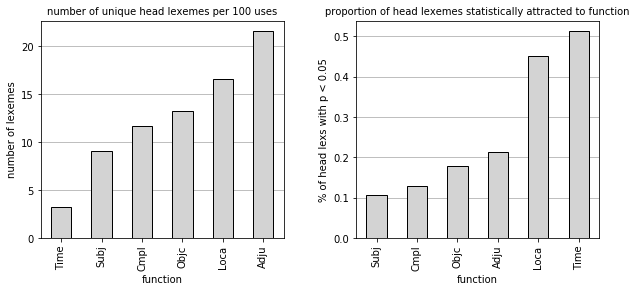

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.3)

head_per_100.plot(kind='bar', ax=ax1, color='lightgrey', edgecolor='black')
ax1.set_xlabel('function')
ax1.set_ylabel('number of lexemes')
ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_title('number of unique head lexemes per 100 uses', size=10)

sig_heads_prop.plot(kind='bar', ax=ax2, color='lightgrey', edgecolor='black')
ax2.set_xlabel('function')
ax2.set_ylabel('% of head lexs with p < 0.05')
ax2.grid(axis='y')
ax2.set_axisbelow(True) 
ax2.set_title('proportion of head lexemes statistically attracted to function', size=10)
              
savefig('function_head_associations')
plt.show()